# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. Más adelante, encontrarás en las instrucciones del proyecto cuáles son exactamente los aspectos del comportamiento de los clientes que debes analizar. Determinar qué plan, en promedio, aporta más ingresos es una cuestión que se abordará mediante pruebas estadísticas. Más adelante encontrarás más información al respecto en la sección de instrucciones del proyecto.

Descripción de las tarifas
Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.
Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.


## Inicialización

In [4]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [5]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [6]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [7]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

A primera vista nuestro data set para los planes no presenta ningun inconveniente pues no presenta ningun tipo de dato vacio o repetido, solo son dos filas, las cuales contienen la informacion de los planes.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
# No es necesario, ya contamos con la informacion requerida

## Usuarios/as

In [10]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprime una muestra de datos para usuarios
print('Duplicados', users.duplicated().sum())
print('User_id', users.duplicated('user_id').sum())
print('churn_date', (users['churn_date'].isnull().sum() / len(users['churn_date'])) *100,'%')
users.sample(5)

Duplicados 0
User_id 0
churn_date 93.2 %


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
462,1462,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,NaN
413,1413,Andre,Hensley,38,"Bakersfield, CA MSA",2018-07-12,surf,NaN
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaN
224,1224,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-06-28,ultimate,NaN
354,1354,Leonel,Dyer,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-24,ultimate,NaN


In [12]:
users[users['churn_date'].notnull()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Lo que podemos observar inicialmente con los datos es: el tipo de datos de cada una de las columnas, las columnas con fechas no aparecen con el tipo de dato correcto, esto se puede corregir convirtiedolas en Dtype(datetime), tambien se observa que la columna churn_date cuenta con una gran cantidad de datos nulos, sin embargo no se considera necesario realizar modificacion mas alla que ajustar el Dtype, ya que lo que nos indica la columna es la fecha en la que el usuario dejo el servicio, por lo tanto se asume que los datos nulos son de usuarios actualmente. 
Adicional a esto tambien se puede considerar separar los nombres de las ciudades y estados, y se puede eliminar MSA (Metropolitan Statistical Area). 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
users[['cities','states']] = users['city'].str.split(',',expand = True)
users.pop('city')
users['states'] = users['states'].str.strip()
users['states'] = users['states'].str.replace(' ','-')
users['states'] = users['states'].str.replace('-MSA','')
users

,user_id,first_name,last_name,age,reg_date,plan,churn_date,cities,states
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,NaT,Las Vegas-Henderson-Paradise,NV
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,NaT,Tulsa,OK
4,1004,Leonila,Thompson,40,2018-05-23,surf,NaT,Seattle-Tacoma-Bellevue,WA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,NaT,New Orleans-Metairie,LA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,NaT,Los Angeles-Long Beach-Anaheim,CA
498,1498,Scot,Williamson,51,2018-02-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA


## Llamadas

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprime una muestra de datos para las llamadas
print('Duplicados', calls.duplicated().sum())
print('Duplicados_id', calls.duplicated('id').sum())
calls

Duplicados 0
Duplicados_id 0


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos no presentan valores duplicados ni valores nulos o vacios, lo que si se puede ver es que el tipo de dato de la columna fecha no es el adecuado y se puede ajustar a un tipo de dato para fechas

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format = '%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
calls['day'] = calls['call_date'].dt.day
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
calls

,id,user_id,call_date,duration,day,month,year
0,1000_93,1000,2018-12-27,8.52,27,12,2018
1,1000_145,1000,2018-12-27,13.66,27,12,2018
2,1000_247,1000,2018-12-27,14.48,27,12,2018
3,1000_309,1000,2018-12-28,5.76,28,12,2018
4,1000_380,1000,2018-12-30,4.22,30,12,2018
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,21,11,2018
137731,1499_200,1499,2018-10-20,10.89,20,10,2018
137732,1499_201,1499,2018-09-21,8.12,21,9,2018
137733,1499_202,1499,2018-10-10,0.37,10,10,2018


## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Imprime una muestra de datos para los mensajes
print('Duplicados', messages.duplicated().sum())
print('Duplicados_id', messages.duplicated('id').sum())
messages

Duplicados 0
Duplicados_id 0


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

AL igual que las llamadas no vemos valores duplicados o ausentes, sin embargo si se puede apreciar que el tipo de datos para la columna de fechas se puede corregir y usar el apropiado para este tipo de datos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
messages['day'] = messages['message_date'].dt.day
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year
messages.head()

,id,user_id,message_date,day,month,year
0,1000_125,1000,2018-12-27,27,12,2018
1,1000_160,1000,2018-12-31,31,12,2018
2,1000_223,1000,2018-12-31,31,12,2018
3,1000_251,1000,2018-12-27,27,12,2018
4,1000_255,1000,2018-12-26,26,12,2018


## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet
print('Duplicados', internet.duplicated().sum())
print('Duplicados_id', internet['id'].duplicated().sum())
internet.sample(10)

Duplicados 0
Duplicados_id 0


,id,user_id,session_date,mb_used
34488,1156_85,1156,2018-09-17,0.00
82724,1386_39,1386,2018-12-31,361.48
18202,1081_271,1081,2018-10-12,651.01
102010,1489_22,1489,2018-10-20,265.83
90400,1416_132,1416,2018-10-09,595.31
61802,1280_375,1280,2018-12-27,320.34
65953,1305_140,1305,2018-09-10,79.21
61081,1277_384,1277,2018-09-13,14.05
25827,1120_400,1120,2018-05-23,537.87
99369,1468_98,1468,2018-11-05,370.34


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Nuevamente parece que no hay duplicados totales o duplicadops en el Id del data set, por otro lado al igual que los data sets anteriores vemos que tenemos la oportunidad de mejora en cuanto a la columna de fechas, podemos transformarla en el tipo de datos adecuados para trabajar con esos datos de manera optima.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format = '%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [26]:
internet['day'] = internet['session_date'].dt.day
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year
print(internet['year'].unique())
internet

[2018]


,id,user_id,session_date,mb_used,day,month,year
0,1000_13,1000,2018-12-29,89.86,29,12,2018
1,1000_204,1000,2018-12-31,0.00,31,12,2018
2,1000_379,1000,2018-12-28,660.40,28,12,2018
3,1000_413,1000,2018-12-26,270.99,26,12,2018
4,1000_442,1000,2018-12-27,880.22,27,12,2018
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,20,10,2018
104821,1499_216,1499,2018-12-30,304.72,30,12,2018
104822,1499_217,1499,2018-09-22,292.75,22,9,2018
104823,1499_218,1499,2018-12-07,0.00,7,12,2018


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [28]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
total_calls = calls.groupby(['user_id','month'])['id'].count().reset_index(name = 'count_calls')
total_calls

,user_id,month,count_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [29]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_calls = calls.groupby(['user_id','month'])['duration'].sum().reset_index(name = 'call_duration')
monthly_calls

,user_id,month,call_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [30]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages.groupby(['user_id','month'])['id'].count().reset_index(name = 'messages')
monthly_messages

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name ='mb_used')
monthly_internet

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged = total_calls.merge(monthly_calls,
                           on = ['user_id','month'],
                           how = 'outer')
merged = merged.merge(monthly_messages, on = ['user_id','month'], how = 'outer')
df_merged = merged.merge(monthly_internet, on = ['user_id','month'], how = 'outer')

df_merged.head()

,user_id,month,count_calls,call_duration,messages,mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30


In [33]:
# Añade la información de la tarifa
df_merged = df_merged.merge(users[['user_id', 'plan']], on = 'user_id', how = 'left')
# Se debe rellenar los valores vacios con 0 debido a que hay meses en que los usuarios no estaban dentro del plan 
df_merged.fillna(0, inplace = True)
df_merged

,user_id,month,count_calls,call_duration,messages,mb_used,plan
0,1000,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,surf
2,1001,9,49.0,297.69,44.0,13314.82,surf
3,1001,10,65.0,374.11,53.0,22330.49,surf
4,1001,11,64.0,404.59,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,0.0,23137.69,surf
2289,1499,9,41.0,330.37,0.0,12984.76,surf
2290,1499,10,53.0,363.28,0.0,19492.43,surf
2291,1499,11,45.0,288.56,0.0,16813.83,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [34]:
# Calcula el ingreso mensual para cada usuario

def monthly_revenue(row):
    # Obtener loas condiciones de los planes filtrando por fila
    plan = plans[plans['plan_name'] == row['plan']].iloc[0]
    
    # Costo adicional de las llamadas, incluimos el cero al final para usarlo como filtro y evitar valores negativos.
    call_cost = max(row['call_duration'] - plan['minutes_included'], 0) * plan['usd_per_minute']
    
    message_cost = max(row['messages'] - plan['messages_included'], 0) * plan['usd_per_message']

    # Dado que el costo lo estan cobrando por Gb y no Mb, debemos convertir los Mb en Gb
    gb_used = row['mb_used'] / 1024
    gb_included = plan['mb_per_month_included'] / 1024
    internet_cost = max(gb_used - gb_included, 0) * plan['usd_per_gb']
    
    total_cost = call_cost + message_cost + internet_cost + plan['usd_monthly_pay']
    
    return total_cost

# Con el metodo apply podemos usar nuestra funcion y lo aplicamos a cada fila con axis = 1
df_merged['monthly_revenue'] = df_merged.apply(monthly_revenue, axis=1)

df_merged.head()

,user_id,month,count_calls,call_duration,messages,mb_used,plan,monthly_revenue
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,70.000000
1,1001,8,27.0,171.14,30.0,6919.15,surf,20.000000
2,1001,9,49.0,297.69,44.0,13314.82,surf,20.000000
3,1001,10,65.0,374.11,53.0,22330.49,surf,88.161191
4,1001,11,64.0,404.59,36.0,18504.30,surf,50.706055


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

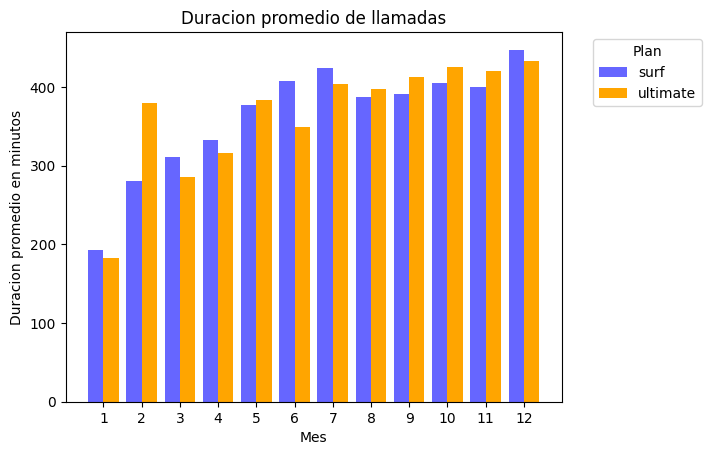

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_dur = df_merged.groupby(['month','plan'])['call_duration'].mean().reset_index(name = 'avg_duration')
#avg_call_dur
surf_users = avg_call_dur[avg_call_dur['plan']=='surf']
ultimate_users = avg_call_dur[avg_call_dur['plan']=='ultimate']

plt.bar(surf_users['month'] -0.2,
        surf_users['avg_duration'],
        alpha = 0.6,
        width = 0.4,
        label = 'surf',
        color = 'blue')

plt.bar(ultimate_users['month'] +0.2,
        ultimate_users['avg_duration'],
        width = 0.4,
        label = 'ultimate',
        color = 'orange')

plt.xticks(surf_users['month'])
plt.title('Duracion promedio de llamadas')
plt.xlabel('Mes')
plt.ylabel('Duracion promedio en minutos')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

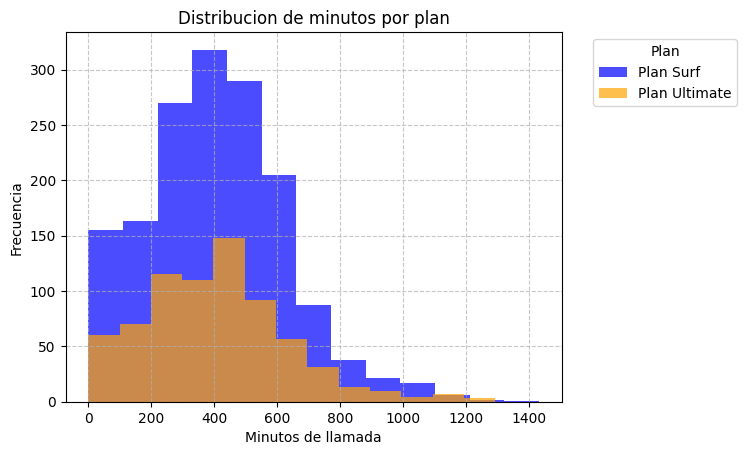

In [36]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_minutes = df_merged[df_merged['plan'] == 'surf']['call_duration'].reset_index()
ultimate_minutes = df_merged[df_merged['plan'] == 'ultimate']['call_duration'].reset_index()
#surf_minutes
plt.hist(surf_minutes['call_duration'], bins=13, alpha=0.7, label='Plan Surf', color = 'blue')
plt.hist(ultimate_minutes['call_duration'],bins = 13, alpha = 0.7, label = 'Plan Ultimate', color = 'orange')
plt.title('Distribucion de minutos por plan')
plt.xlabel('Minutos de llamada')
plt.ylabel('Frecuencia')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_duration = df_merged.groupby('plan')['call_duration'].agg(['mean', 'var']).reset_index()
stats_duration

,plan,mean,var
0,surf,404.762390,49135.104891
1,ultimate,406.193083,51640.971402


/tmp/ipykernel_5773/2987754043.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_minutes['call_duration'],ultimate_minutes['call_duration']], labels=['Surf Minutes', 'Ultimate Minutes'])


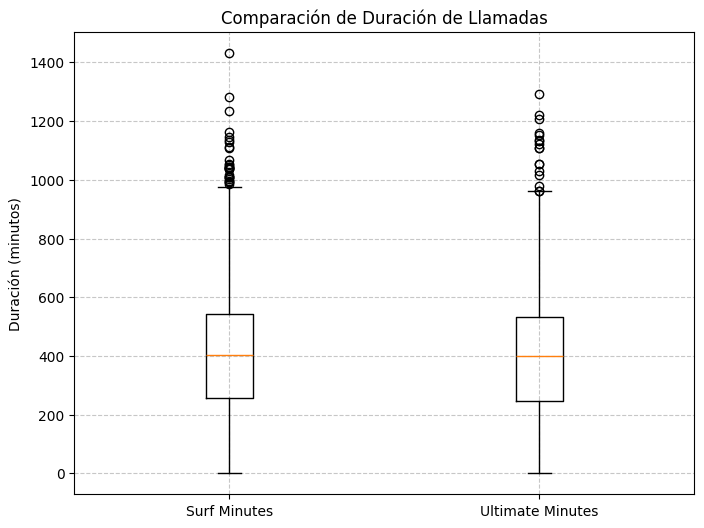

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8, 6))
plt.boxplot([surf_minutes['call_duration'],ultimate_minutes['call_duration']], labels=['Surf Minutes', 'Ultimate Minutes'])
plt.title('Comparación de Duración de Llamadas')
plt.ylabel('Duración (minutos)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


Podemos ver que tanto los planes surf y ultimate tienden a comportarse de manera muy similiar y con una media casi que igual, con una varianza no muy grande podemos decir que los datos de las personas del plan ultimate tienen los datos un poco mas dispersos que las personas del plan surf; Tambien podemos observar en la grafica de cajas que los datos atipicos suelen estar al extremo derecho lo que nos indica que pocas personas suelen gastar o tener llamadas muy largas. 

### Mensajes

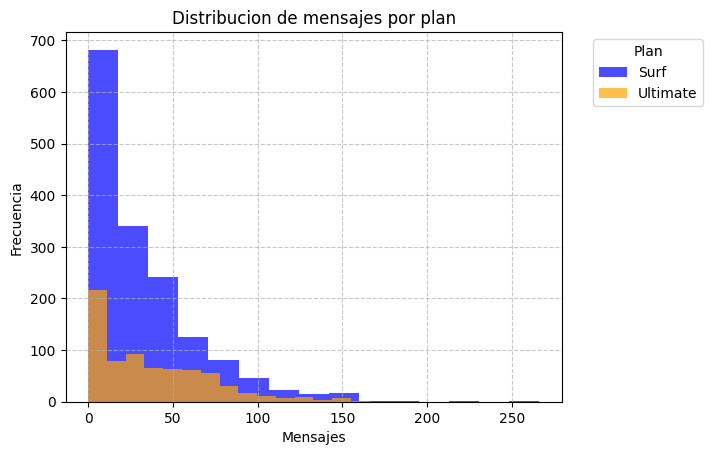

In [39]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_msg = df_merged[df_merged['plan'] == 'surf']['messages'].reset_index()
ultimate_msg = df_merged[df_merged['plan'] == 'ultimate']['messages'].reset_index()

#Crear Histograma
plt.hist(surf_msg['messages'], bins=15, alpha=0.7, label='Surf', color = 'blue')
plt.hist(ultimate_msg['messages'],bins = 15, alpha = 0.7, label = 'Ultimate', color = 'orange')
plt.title('Distribucion de mensajes por plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_5773/2703753520.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_msg['messages'],ultimate_msg['messages']], labels=['Surf Msg', 'Ultimate Msg'])


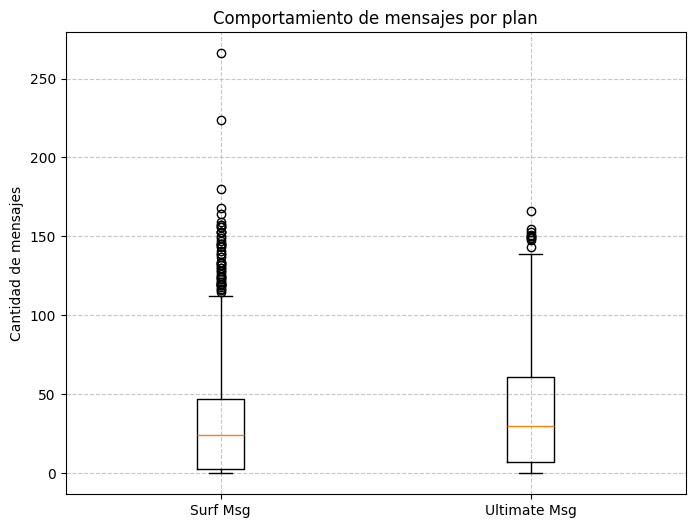

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot([surf_msg['messages'],ultimate_msg['messages']], labels=['Surf Msg', 'Ultimate Msg'])
plt.title('Comportamiento de mensajes por plan')
plt.ylabel('Cantidad de mensajes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [41]:
stats_duration = df_merged.groupby('plan')['messages'].agg(['mean', 'var']).reset_index()
stats_duration

,plan,mean,var
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Podemos concluir que los usuarios del plan surf no estan tan dispersos, sin embargo si presenta valores atipicos mas pronunciados que los del plan ultimate, agregando si bien la media de ambos planes es muy similar los usuarios del plan sur suelen enviar menos mensajes, mientras que los usuarios ultimate tienen una media un poco mas alta y como se observa en la grafica de cajas tienden a estar mas dispersos en comparacion a los usuarios surf

### Internet

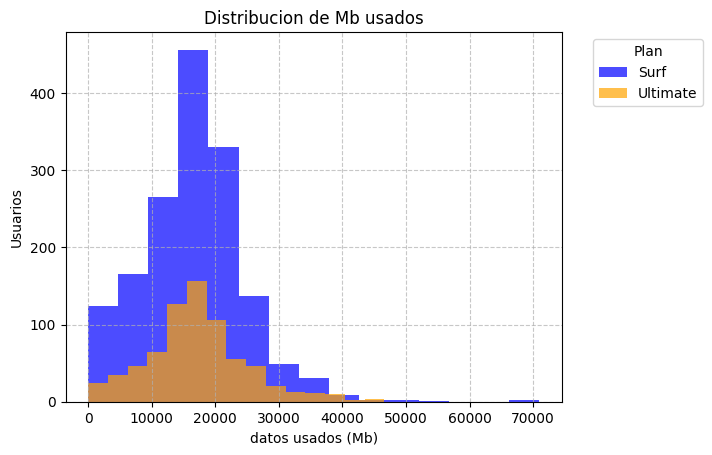

In [42]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

int_surf = df_merged[df_merged['plan'] == 'surf']['mb_used'].reset_index()
int_ultimate = df_merged[df_merged['plan'] == 'ultimate']['mb_used'].reset_index()

plt.hist(int_surf['mb_used'], bins=15, alpha=0.7, label='Surf', color = 'blue')
plt.hist(int_ultimate['mb_used'],bins = 15, alpha = 0.7, label = 'Ultimate', color = 'orange')
plt.title('Distribucion de Mb usados')
plt.xlabel('datos usados (Mb)')
plt.ylabel('Usuarios')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_5773/585388335.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([int_surf['mb_used'],int_ultimate['mb_used']], labels=['Surf', 'Ultimate'])


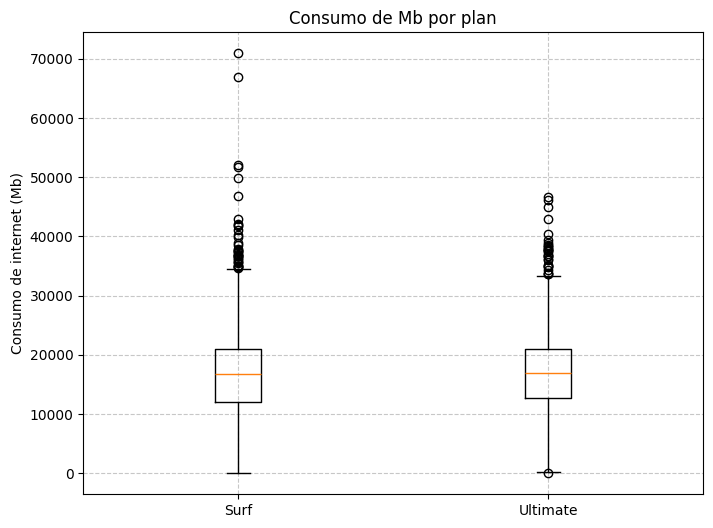

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot([int_surf['mb_used'],int_ultimate['mb_used']], labels=['Surf', 'Ultimate'])
plt.title('Consumo de Mb por plan')
plt.ylabel('Consumo de internet (Mb)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [44]:
stats_internet = df_merged.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
stats_internet

,plan,mean,var
0,surf,16558.283490,6.421640e+07
1,ultimate,17214.699694,6.165229e+07


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Del comportamiento uso de internet entre los usuarios de los planes surf y ultimate podemos concluir que:
En promedio los usuarios del plan ultimate consumen mas datos que los usuarios del plan surf con una media de 17214 Megabites.
Algunos usuaris del plan surf suelen gastar mas datos generando valores atipicos mas grandes que los del plan ultimate.
Los usuarios del plan surf estan menos dispersos en cuanto a la cantidad de datos que usan, contrario a los usuarios del plan ultimate. 

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [48]:
surf_rev = df_merged[df_merged['plan']=='surf']['monthly_revenue'].reset_index()
print(surf_rev['monthly_revenue'].sum())

ultimate_rev = df_merged[df_merged['plan']=='ultimate']['monthly_revenue'].reset_index()
print(ultimate_rev['monthly_revenue'].sum())

90123.12233828125
51923.57734375


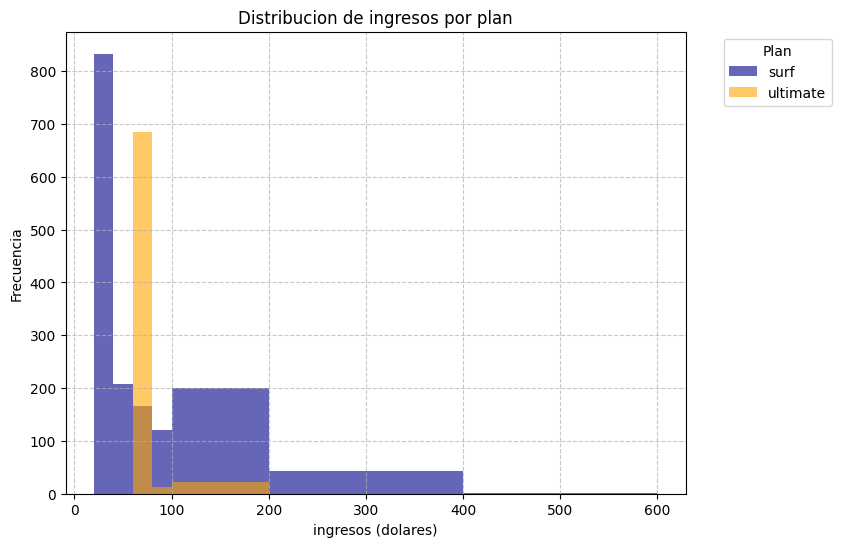

In [49]:
# Crear Histogragrama para comparar
plt.figure(figsize=(8, 6))
plt.hist(surf_rev['monthly_revenue'],bins = [20,40,60,80,100,200,400,600], alpha = 0.6, label = 'surf', color = 'darkblue')
plt.hist(ultimate_rev['monthly_revenue'],bins = [20,40,60,80,100,200,400,600], alpha = 0.6, label = 'ultimate', color = 'orange')
plt.title('Distribucion de ingresos por plan')
plt.xlabel('ingresos (dolares)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

/tmp/ipykernel_5773/3228659139.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_rev['monthly_revenue'],ultimate_rev['monthly_revenue']], labels= ['Surf','Ultimate'])


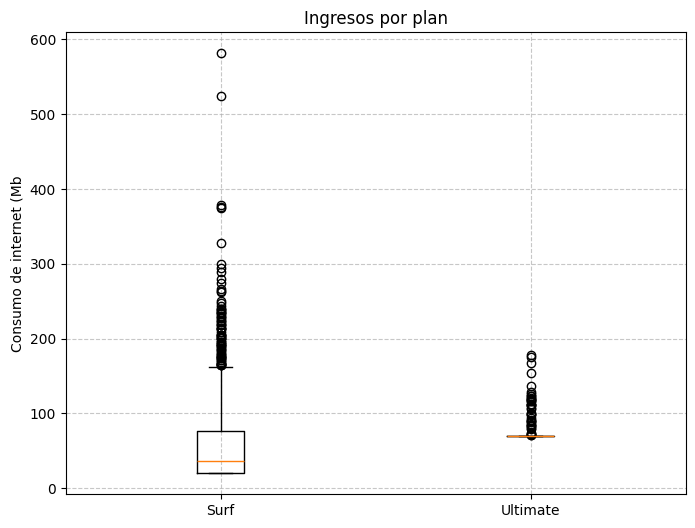

In [50]:
plt.figure(figsize=(8, 6))
plt.boxplot([surf_rev['monthly_revenue'],ultimate_rev['monthly_revenue']], labels= ['Surf','Ultimate'])
plt.title('Ingresos por plan')
plt.ylabel('Consumo de internet (Mb')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [51]:
stats_rev = df_merged.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()
stats_rev

,plan,mean,var
0,surf,57.293784,2887.544971
1,ultimate,72.116080,115.968081


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Podemos concluir que los usuarios del plan surf tienden a gastar mas de lo que esta dentro del plan de pagos, debido a que usualmente suelen exceder los limites de su plan como se puede observar en los analisis de llamadas, mensajes e internet, los usuarios de surf presentan una varianza mas alejada de la media que los usuarios de ultimate, lo cual podemos interpretar como la dispersion de pagos es mayor por cliente que el plan ultimate el cual podemos ver que su media no supera por mucho el plan de pagos establecido en su plan, y aun en sus variaciones no es tan disperso como los usuarios del plan Surf

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [52]:
# Prueba las hipótesis
# Hipotesis nula: No hay diferencia entre los ingresos promedio de los usuarios de Ultimate y Surf

# nivel crítico de significación estadística
alpha = 0.05

var_surf = np.var(surf_rev['monthly_revenue'])
var_ultimate = np.var(ultimate_rev['monthly_revenue'])

# hipotesis sobre igualdad de dos plobaciones.
results = st.ttest_ind(surf_rev['monthly_revenue'],ultimate_rev['monthly_revenue'], equal_var = False)

print('valor p:',results.pvalue) 

# Se compara los valores p obtenidos con el nivel de significación estadística
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print(f'los ingresos promedio si son diferentes entre los usuarios de los planes Ultimate y Surf')

valor p: 4.881852673479799e-25
Rechazamos la hipótesis nula
los ingresos promedio si son diferentes entre los usuarios de los planes Ultimate y Surf


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula: el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
Hipotesis alternativa : el ingreso promedio de los usuarios del área NY-NJ, NO es diferente al de los usuarios de otras regiones.

In [53]:
# Prueba las hipótesis
df_merge_st = df_merged.merge(users[['user_id','states']],on ='user_id', how = 'left')

# data frame filtrado con NY-NJ
df_fil_st = df_merge_st[df_merge_st['states'].str.contains('NY-NJ', na =False)]

# data frame filtrado con las exepciones de NY-NJ
df_fil = df_merge_st[~df_merge_st['states'].str.contains('NY-NJ', na =False)]

# hipotesis sobre igualdad de dos plobaciones.
results = st.ttest_ind(df_fil_st['monthly_revenue'],df_fil['monthly_revenue'],equal_var = False)

alpha = 0.05

print('valor p:',results.pvalue) 

# Se compara los valores p obtenidos con el nivel de significación estadística
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print('Debido a que el P valor es menor a 5% rechazamos la hipotesis de que el ingreso promedio de los usuarios del area establecida\nson iguales a los de otras regiones') 

valor p: 0.01860947297497194
Rechazamos la hipótesis nula
Debido a que el P valor es menor a 5% rechazamos la hipotesis de que el ingreso promedio de los usuarios del area establecida
son iguales a los de otras regiones


Podemos finalizar con las siguientes concluisones:
Los usuarios del plan surf tienden a exceder los limites dentro de su plan de pagos, por ello terminan pagando mas.
Los usuarios del plan surf son los que mas brindan ingresos, debido a que usualmente suelen exceder el plan.
Los usuarios del plan ultimate en promedio consumen mas datos que los usuarios del plan surf.
Los usuarios del plan ultimate tienden a estar mas dispersos en el uso de datos (llamadas, mensajes, internet) en comparacion a los usuarios del plan surf, sin embargo es mas comun encontrar valores atipicos hacia la derecha en estos ultimos lo que nos indica que suelen pasarse del plan.
Los ingresos si varian respecto a los usuarios del plan ultimate y surf.